Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.
xây dựng model, tìm tham số.
dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [38]:
dt = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv")


In [39]:
dt.rename(columns = {'Thời gian làm việc': 'Time'}, inplace= True)


In [40]:
dt.rename(columns={'Lương': 'Money'}, inplace = True)

In [41]:
dt.head(2)

,Money,Time,Cho vay
0,10,1.0,1
1,5,2.0,1


In [42]:
X = dt[['Money','Time']]
X = X.to_numpy()
ones = np.ones((len(X), 1))
X = np.concatenate((ones, X), axis = 1)
print(X)

[[ 1.   10.    1.  ]
 [ 1.    5.    2.  ]
 [ 1.    6.    1.8 ]
 [ 1.    7.    1.  ]
 [ 1.    8.    2.  ]
 [ 1.    9.    0.5 ]
 [ 1.    4.    3.  ]
 [ 1.    5.    2.5 ]
 [ 1.    8.    1.  ]
 [ 1.    4.    2.5 ]
 [ 1.    8.    0.1 ]
 [ 1.    7.    0.15]
 [ 1.    4.    1.  ]
 [ 1.    5.    0.8 ]
 [ 1.    7.    0.3 ]
 [ 1.    4.    1.  ]
 [ 1.    5.    0.5 ]
 [ 1.    6.    0.3 ]
 [ 1.    7.    0.2 ]
 [ 1.    8.    0.15]]


In [79]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def f(dudoan , daco ):
  import numpy as np 
  a = -(np.sum(np.multiply(daco,np.log(dudoan))+ np.multiply(1-daco, np.log(1-dudoan))))
  return a 
def y(X, w): 
  y = sigmoid(np.dot(X,w))
  return y 


In [44]:
t = dt[['Cho vay']]
t = t.to_numpy()


38.41208363041363
38.41208363041363
38.40012195845247
37.754588212741396
20.059726912648728
0.03299931745674378
0.032715383733332715
0.0325215311164726
0.03233345852924252
0.03214614481249711
0.0319592947731433
0.03177290472926231
0.031586989899858864
0.031401566501742195
0.031216650748550734
0.03103225873606874
0.030848406437872455
0.030665109695426906
0.030482384211151015
0.030300245540937354
0.03011870908691172
0.029937790090245997
0.02975750362403673
0.02957786458635958
0.029398887693318443
0.029220587472345017
0.029042978255466423
0.028866074172857026
0.02868988914638848
0.02851443688341071
0.02833973087064834
0.028165784368223257
0.027992610403895668
0.02782022176742238
0.02764863100509274
0.027477850414465266
0.02730789203924111
0.027138767664389718
0.026970488811363325
0.02680306673362587
0.026636512412277824
0.02647083655195992
0.02630604957689009
0.02614216162719174
0.02597918255536591
0.025817121922996122
0.025655988997723256
0.025495792750337642
0.025336541852222894
0.02517

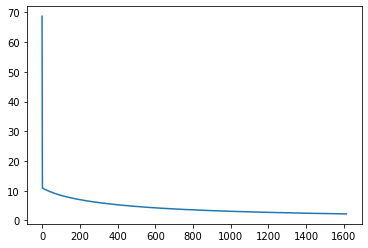

In [148]:
list1 = []
w_pre = np.array([[1],
             [2],
             [3]])
learning_rate = 0.01
X_T = X.transpose()
w_next = w_pre - learning_rate * np.dot(X_T, y(X,w_pre)- t)
# i = 1 
print(abs(f(y(X, w_next),t) - f(y(X, w_pre), t)))
while (abs(f(y(X, w_next),t) - f(y(X, w_pre), t)) > 0.001) :
# & (abs(f(y(X,w_next),t)- f(y(X, w_pre), t)) < 1000) :  
  # print(abs(f(y(X, w_next),t) - f(y(X, w_pre), t)))
  w_pre = w_next
  w_next = w_pre - learning_rate * X_T.dot(y(X,w_pre)- t )
  list1.append(f(y(X,w_next), t))
else:
    print(w_next)
plt.plot(list1)


In [149]:
w_next

array([[-9.40626003],
       [ 0.86648555],
       [ 4.37425814]])

In [150]:
def dudoany(x1,x2, w): 
  return sigmoid(w[0,0] + x1 * w[1,0] + x2 * w[2,0])


In [151]:
dudoany(2,3 , w_next)

0.9957198824039593

In [152]:
dudoany(1,8,w_next)

0.9999999999967562

In [153]:
dudoany(5,5,w_next)

0.9999999493060098